In [2]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.utils import to_categorical
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

print (tf.__version__) # 2.12.0

2.12.0


### Loading the fashion MNIST data 

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()






170498071/170498071 [==============================] - 2s 0us/step


In [4]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:

# class names are not included, need to create them to plot the images  
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

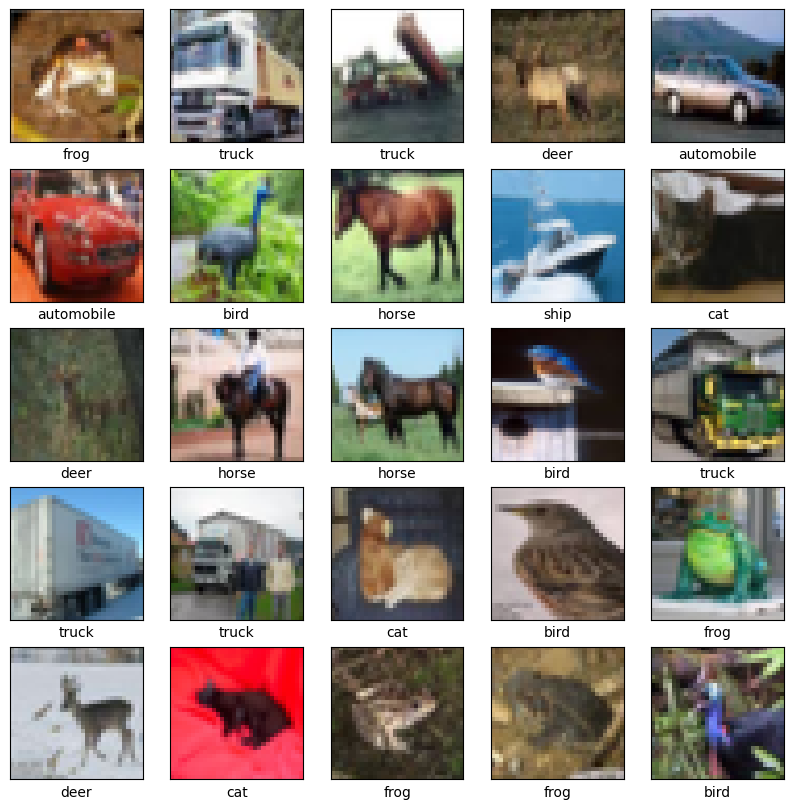

In [6]:
# display the first 25 images from the training set and 
# display the class name below each image
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)

	plt.xlabel(class_names[int(train_labels[i])])

### Exploring and Visualizing the data

In [7]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (50000, 32, 32, 3)
test_images: (10000, 32, 32, 3)


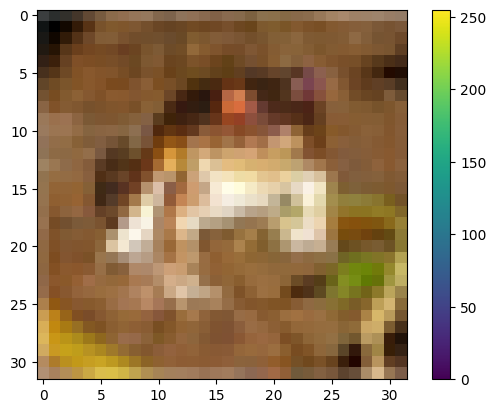

In [8]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Train classes distribution

In [9]:
plot_data = []
def get_classes_distribution(train_images, train_labels):


    # Get total number of samples
    total_samples = train_images.shape[0]

    
    # Count the number of items in each class
    for i in range(len(class_names)):
        label = class_names[i]      
        #Extract all shirt indices -- to BALANCE -- shirt
        count = len([j for j, x in enumerate(train_labels) if x == i])
        percent = (count / total_samples) * 100
        plot_data.append(count)
        print("{:<20s}:   {} or {}%".format(label, count, percent))

    return  plot_data  

plot_data = get_classes_distribution(train_images, train_labels)

airplane            :   5000 or 10.0%
automobile          :   5000 or 10.0%
bird                :   5000 or 10.0%
cat                 :   5000 or 10.0%
deer                :   5000 or 10.0%
dog                 :   5000 or 10.0%
frog                :   5000 or 10.0%
horse               :   5000 or 10.0%
ship                :   5000 or 10.0%
truck               :   5000 or 10.0%


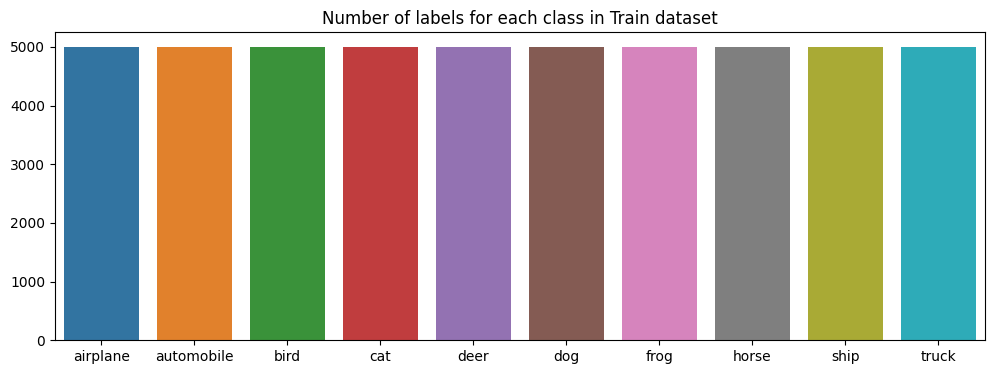

In [10]:
def plot_label_per_class(plot_data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
  
    # Create barplot
    g = sns.barplot(x=class_names, y=plot_data, ax=ax)
    
    #g = sns.countplot(data = df)
    g.set_title("Number of labels for each class in Train dataset")
    plt.show()  
    
plot_label_per_class(plot_data)

Test classes distribution

In [11]:
plot_data = []
def get_classes_distribution(train_images, train_labels):


    # Get total number of samples
    total_samples = test_images.shape[0]

    
    # Count the number of items in each class
    for i in range(len(class_names)):
        label = class_names[i]      
        #Extract all shirt indices -- to BALANCE -- shirt
        count = len([j for j, x in enumerate(test_labels) if x == i])
        percent = (count / total_samples) * 100
        plot_data.append(count)
        print("{:<20s}:   {} or {}%".format(label, count, percent))

    return  plot_data  

plot_data = get_classes_distribution(test_images, test_labels)

airplane            :   1000 or 10.0%
automobile          :   1000 or 10.0%
bird                :   1000 or 10.0%
cat                 :   1000 or 10.0%
deer                :   1000 or 10.0%
dog                 :   1000 or 10.0%
frog                :   1000 or 10.0%
horse               :   1000 or 10.0%
ship                :   1000 or 10.0%
truck               :   1000 or 10.0%


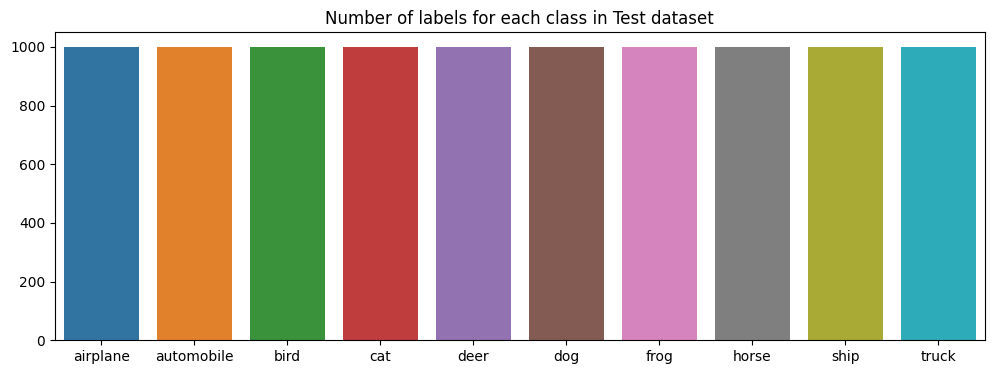

In [12]:
def plot_label_per_class(plot_data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
  
    # Create barplot
    g = sns.barplot(x=class_names, y=plot_data, ax=ax)
    
    #g = sns.countplot(data = df)
    g.set_title("Number of labels for each class in Test dataset")
    plt.show()  
    
plot_label_per_class(plot_data)

### Normalizing the data 

In [13]:
def data_preprocessing(images, labels):
    out_y = to_categorical(labels, 10)
    num_images = images.shape[0]
    x_shaped_array = images
    out_x = x_shaped_array / 255


    return out_x, out_y

In [14]:
# prepare the data
train_images, train_labels = data_preprocessing(train_images, train_labels)
test_images, test_labels = data_preprocessing(test_images, test_labels)

In [15]:
train_images.shape

(50000, 32, 32, 3)

In [16]:
train_labels.shape

(50000, 10)

# **feature extraction**

In [17]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [18]:
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [19]:
conv_base.trainable = True

model_CNN = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(128, activation="relu"),
   layers.Dropout(0.3),
   layers.Dense(10, activation="softmax"),
])

In [20]:
optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9)
plateau = ReduceLROnPlateau(monitor="val_loss", factor=0.7, patience=1, verbose=1)
earlystopping = EarlyStopping(monitor="val_loss", patience=10, verbose=1)
model_CNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [21]:
model_CNN.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 14,781,642
Non-trainable params: 0
_________________________________________________________________


In [22]:
train_gen = ImageDataGenerator(rotation_range=15, width_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_gen.flow(train_images, train_labels, batch_size=32)

In [23]:
# History
history_CNN=model_CNN.fit(train_generator, epochs=50, batch_size=32, verbose=1, validation_data=(test_images, test_labels), callbacks=[plateau, earlystopping])

test_loss, test_acc = model_CNN.evaluate(test_images, test_labels)
print("Model _ vgg16 - test loss:", test_loss * 100)
print("Model _ vgg16 - test accuracy:", test_acc * 100)


Epoch 1/50
1563/1563 [==============================] - 61s 32ms/step - loss: 1.1499 - accuracy: 0.6020 - val_loss: 0.7208 - val_accuracy: 0.7560 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7718 - accuracy: 0.7397 - val_loss: 0.6176 - val_accuracy: 0.7872 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6625 - accuracy: 0.7774 - val_loss: 0.5418 - val_accuracy: 0.8175 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 49s 31ms/step - loss: 0.5961 - accuracy: 0.7968 - val_loss: 0.4655 - val_accuracy: 0.8380 - lr: 0.0010
Epoch 5/50
1562/1563 [============================>.] - ETA: 0s - loss: 0.5367 - accuracy: 0.8188
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
1563/1563 [==============================] - 49s 32ms/step - loss: 0.5365 - accuracy: 0.8188 - val_loss: 0.4777 - val_accuracy: 0.8395 - lr: 0.0010
Epoch 6/50
1563/1563 [====================

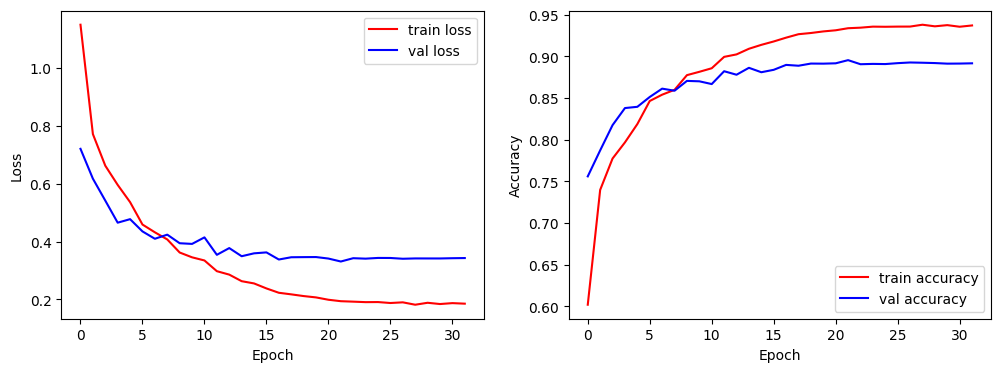

In [25]:
fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)
ax[0].plot(history_CNN.history["loss"], c="r", label="train loss")
ax[0].plot(history_CNN.history["val_loss"], c="b", label="val loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(history_CNN.history["accuracy"], c="r", label="train accuracy")
ax[1].plot(history_CNN.history["val_accuracy"], c="b", label="val accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

In [27]:
model_CNN.save("model.keras")

In [28]:
loaded_model = tf.keras.models.load_model("model.keras")
x = tf.random.uniform((224, 224, 3))

resized_x = tf.image.resize(x, (32, 32))
resized_x = tf.expand_dims(resized_x, axis=0)  # Add a batch dimension

assert np.allclose(model_CNN.predict(resized_x), loaded_model.predict(resized_x))

1/1 [==============================] - 0s 135ms/step


313/313 [==============================] - 2s 7ms/step


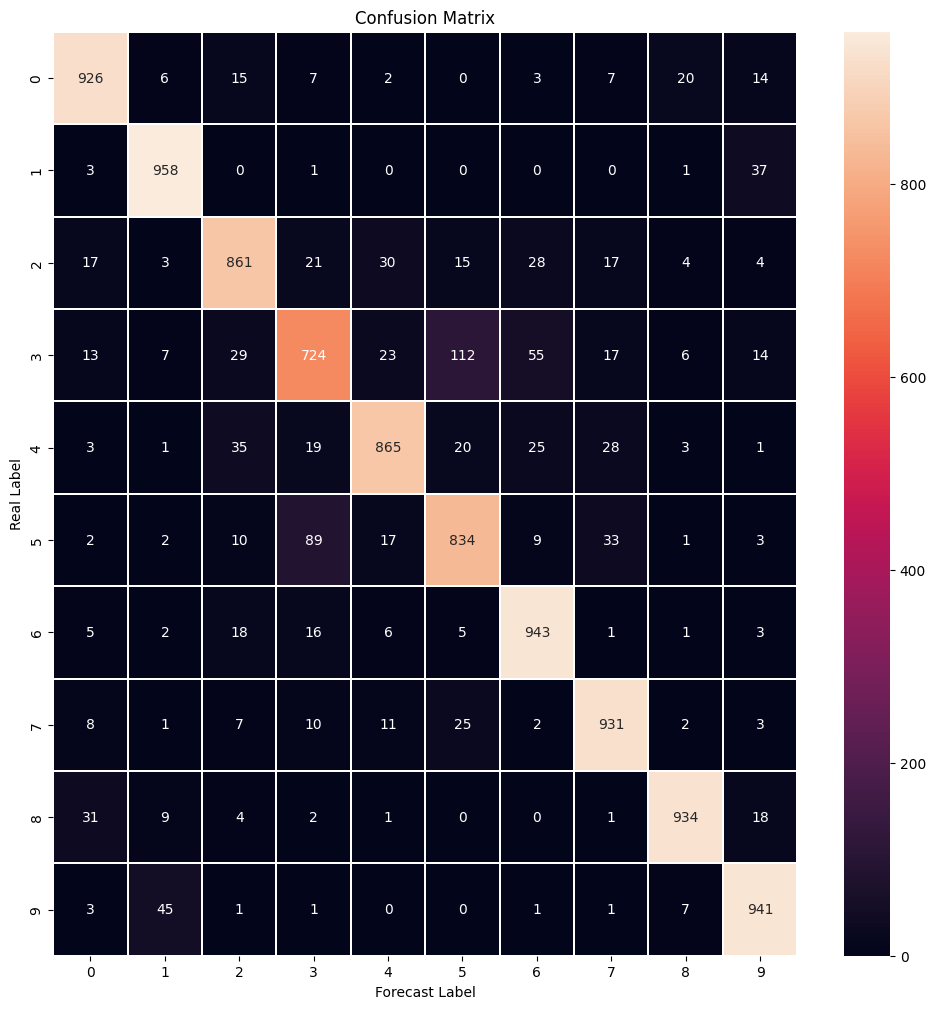

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model_CNN.predict(test_images)#10k images (10 classes x 1000 examples)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)
conf_matrix = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(conf_matrix, annot=True, linewidths=0.1, linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Forecast Label")
plt.ylabel("Real Label")
plt.title("Confusion Matrix")

plt.show()

In [31]:
from google.colab import drive
drive.mount('/content/drive')
#https://drive.google.com/file/d/12700bE-pomYKoVQ214VrpBoJ7akXcTpL/view?usp=share_link

Mounted at /content/drive


In [32]:

import os
model_dir = "VGG16(ACC_0.8917__LOSS_0.3432_)"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = f"/content/drive/MyDrive/data/{model_dir}"
tf.saved_model.save(model_CNN, model_path)